In [101]:
from cProfile import label

import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

In [102]:
df = pd.read_csv('../ressources/corona_cases_belgium.csv', sep=';', parse_dates=True)

In [103]:
df

,DATE,CASES
0,2020-03-01,19
1,2020-03-02,19
2,2020-03-03,34
3,2020-03-04,53
4,2020-03-05,81
...,...,...
1056,2023-01-21,156
1057,2023-01-22,119
1058,2023-01-23,663
1059,2023-01-24,405


In [104]:
df['DATE']

0       2020-03-01
1       2020-03-02
2       2020-03-03
3       2020-03-04
4       2020-03-05
           ...    
1056    2023-01-21
1057    2023-01-22
1058    2023-01-23
1059    2023-01-24
1060    2023-01-25
Name: DATE, Length: 1061, dtype: object

In [105]:
df['CASES']

0        19
1        19
2        34
3        53
4        81
       ... 
1056    156
1057    119
1058    663
1059    405
1060      3
Name: CASES, Length: 1061, dtype: int64

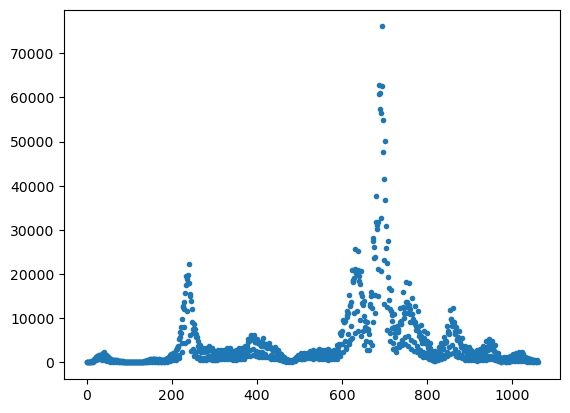

In [106]:
plt.plot(df['CASES'],'.')
plt.show()

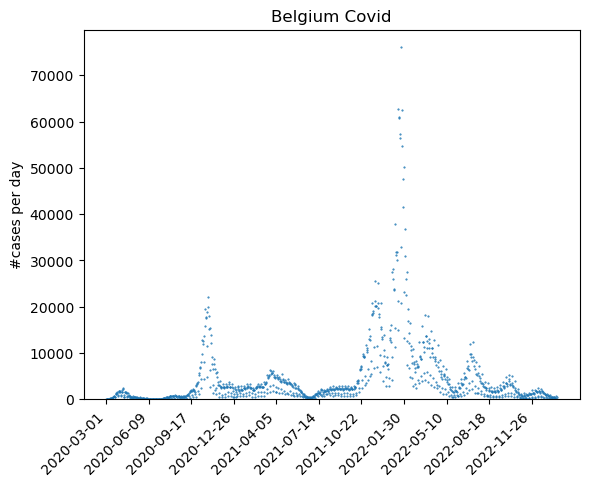

In [107]:
plt.plot(df['DATE'], df['CASES'], '.', markersize=1)
plt.xticks(df.iloc[range(0,df.shape[0],100)]['DATE'], rotation=45, ha='right')
plt.ylabel('#cases per day')
plt.title('Belgium Covid')
plt.ylim(bottom=0)
plt.show()

In [108]:
df['CASES'].max()

76034

In [109]:
df['CASES'].min()

3

In [110]:
df['CASES'].mean()

4421.7709707822805

In [111]:
df['CASES'].median()

2070.0

In [112]:
df['CASES'].var()

58913407.297496155

In [113]:
df['CASES'].std()

7675.506973320796

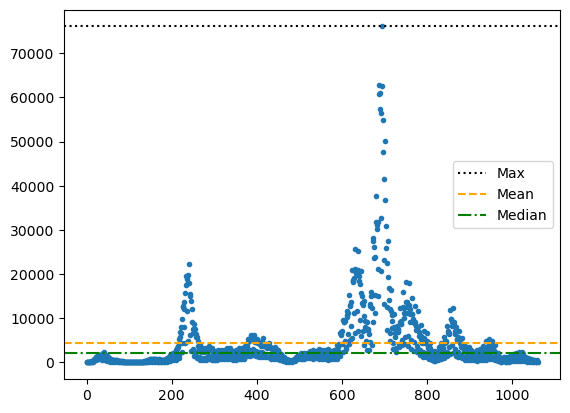

In [114]:
plt.plot(df['CASES'],'.')

#plt.hlines(y=df['CASES'].max(), xmin=0, xmax=df.shape[0],color='black',linestyles='dotted')
#plt.hlines(y=df['CASES'].mean(), xmin=0, xmax=df.shape[0],color='orange',linestyles='dashed')
#plt.hlines(y=df['CASES'].median(), xmin=0, xmax=df.shape[0],color='green',linestyles='dashdot')

plt.axhline(y=df['CASES'].max(), color='black', linestyle='dotted', label="Max")
plt.axhline(y=df['CASES'].mean(), color='orange', linestyle='dashed', label="Mean")
plt.axhline(y=df['CASES'].median(), color='green', linestyle='dashdot', label="Median")
plt.legend()
plt.show()

In [115]:
df.shape

(1061, 2)

In [116]:
df.shape[1]

2

In [117]:
df[df['CASES']==df['CASES'].max()]

,DATE,CASES
694,2022-01-24,76034


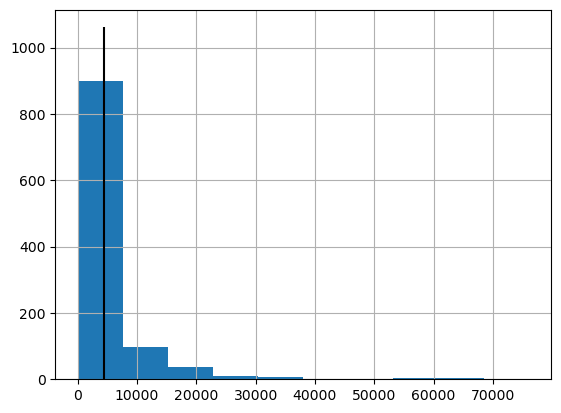

In [118]:
df['CASES'].hist()
plt.vlines(x=df['CASES'].mean(),ymin=0, ymax=df.shape[0], color='black')
plt.show()

In [119]:
df['CASES'].describe()

count     1061.000000
mean      4421.770971
std       7675.506973
min          3.000000
25%        735.000000
50%       2070.000000
75%       4387.000000
max      76034.000000
Name: CASES, dtype: float64

In [120]:
df['CASES'].quantile([0.25,0.50,0.75]).values

array([ 735., 2070., 4387.])

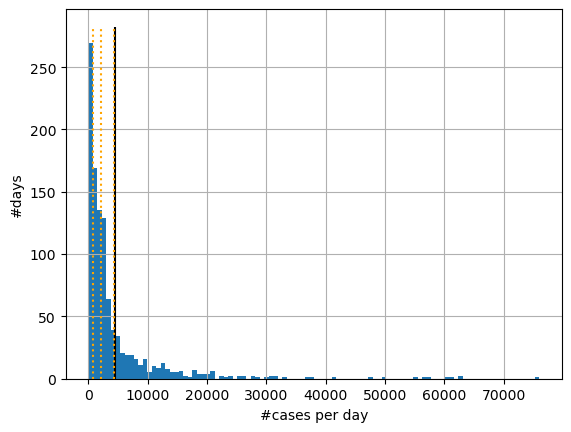

In [121]:
hist = df['CASES'].hist(bins=100)
max_v = hist.get_ylim()[1]
plt.vlines(x=df['CASES'].mean(),ymin=0, ymax=max_v, color='black')
plt.vlines(x=df['CASES'].quantile([0.25,0.50,0.75]).values, ymin=0, ymax=max_v, color='orange', linestyles='dotted')
#plt.xlim(3500,4500)
plt.xlabel('#cases per day')
plt.ylabel('#days')
plt.show()